In [7]:
import pandas as pd
import random
from faker import Faker

In [4]:
df=pd.read_csv("advanced_cybersecurity_data.csv")  #initial dataset with 10000 records

In [5]:
df

,Timestamp,IP_Address,Request_Type,Status_Code,Anomaly_Flag,User_Agent,Session_ID,Location
0,2023-01-01 00:00:00,202.118.116.11,GET,403,0,Edge,4835,Brazil
1,2023-01-01 00:01:00,38.30.40.178,DELETE,301,0,Bot,3176,China
2,2023-01-01 00:02:00,209.5.148.15,POST,500,0,Opera,4312,China
3,2023-01-01 00:03:00,211.116.60.71,GET,301,0,Bot,1003,France
4,2023-01-01 00:04:00,170.166.36.145,POST,404,0,Firefox,1428,Germany
...,...,...,...,...,...,...,...,...
9995,2023-01-07 22:35:00,9.55.84.104,POST,200,0,Bot,2134,USA
9996,2023-01-07 22:36:00,163.68.203.185,POST,500,0,Safari,2126,USA
9997,2023-01-07 22:37:00,45.19.95.162,PUT,200,0,Chrome,3169,Brazil
9998,2023-01-07 22:38:00,45.79.138.173,PUT,301,0,Edge,4560,China


In [8]:
fake = Faker()

In [9]:
# Unique values from original dataset - to be used to create new records
user_agents = df['User_Agent'].dropna().unique().tolist()
request_types = df['Request_Type'].dropna().unique().tolist()
status_codes = df['Status_Code'].dropna().unique().tolist()

In [10]:
# Creating a pool of 25,000 IPs to reuse — this ensures duplicates
ip_pool = [fake.ipv4() for _ in range(25000)]

In [13]:
print(user_agents)
print(request_types)
print(status_codes)

['Edge', 'Bot', 'Opera', 'Firefox', 'Chrome', 'Safari']
['GET', 'DELETE', 'POST', 'PUT']
[403, 301, 500, 404, 200]


In [14]:
print(ip_pool)

['111.164.160.52', '44.40.118.31', '209.203.194.142', '48.95.94.79', '71.190.59.255', '83.75.69.5', '161.105.178.29', '158.198.167.192', '74.222.116.228', '56.236.35.82', '201.173.168.134', '190.140.161.137', '215.116.238.159', '146.99.238.27', '125.26.169.80', '20.27.90.20', '154.103.104.207', '82.86.32.108', '117.217.14.25', '34.184.36.14', '108.232.255.226', '92.146.4.93', '12.67.183.56', '53.238.184.248', '27.95.3.18', '220.11.173.242', '82.89.138.150', '160.233.210.243', '182.224.95.150', '102.208.129.72', '1.93.170.113', '159.89.28.120', '61.47.6.99', '52.254.49.10', '175.142.89.33', '99.8.221.21', '92.48.230.121', '124.254.205.46', '207.96.142.52', '121.58.19.65', '199.231.125.189', '50.119.184.175', '5.39.33.168', '138.52.3.35', '99.131.74.238', '187.252.168.39', '17.47.72.52', '78.146.147.243', '178.255.17.179', '6.89.149.229', '114.15.191.115', '122.144.131.206', '170.78.202.19', '66.103.56.136', '10.203.66.99', '115.50.52.128', '196.228.105.246', '188.35.167.45', '111.133.24

In [15]:
# Number of new synthetic rows
num_rows_to_generate = 80000  # to reach ~90,000 total

In [16]:
synthetic_rows = []

In [17]:
for _ in range(num_rows_to_generate):
    base_row = df.sample(1).iloc[0].copy()

    base_row['IP_Address'] = random.choice(ip_pool)
    base_row['Timestamp'] = fake.date_time_this_year().strftime("%Y-%m-%d %H:%M:%S")
    base_row['User_Agent'] = random.choice(user_agents)
    base_row['Request_Type'] = random.choice(request_types)
    base_row['Status_Code'] = random.choice(status_codes)
    base_row['Location'] = fake.country()
    base_row['Anomaly_Flag'] = random.choices([0, 1], weights=[0.98, 0.02])[0]

    synthetic_rows.append(base_row)

In [18]:
synthetic_df = pd.DataFrame(synthetic_rows)

In [19]:
synthetic_df

,Timestamp,IP_Address,Request_Type,Status_Code,Anomaly_Flag,User_Agent,Session_ID,Location
3770,2025-03-19 09:42:04,148.40.189.158,POST,404,0,Firefox,4577,Suriname
2225,2025-02-25 03:32:54,72.223.209.196,GET,403,0,Edge,4358,Samoa
6730,2025-05-08 03:50:42,72.149.255.36,GET,200,0,Bot,1199,Liechtenstein
2467,2025-03-29 03:48:25,81.236.222.135,GET,200,0,Edge,1982,Albania
2640,2025-01-16 14:03:46,146.73.57.50,PUT,404,0,Opera,2430,Lithuania
...,...,...,...,...,...,...,...,...
5468,2025-06-06 04:37:50,66.35.22.135,POST,200,0,Edge,2601,Gambia
215,2025-02-19 17:23:07,130.239.188.233,GET,500,0,Edge,1951,Norway
9426,2025-06-13 05:01:31,14.183.150.102,GET,500,0,Chrome,2640,Gibraltar
3834,2025-07-13 02:34:03,174.160.87.44,POST,404,0,Firefox,2404,Bulgaria


In [33]:
combined_df = pd.concat([df,synthetic_df ], ignore_index=True)

In [34]:
combined_df

,Timestamp,IP_Address,Request_Type,Status_Code,Anomaly_Flag,User_Agent,Session_ID,Location
0,2023-01-01 00:00:00,202.118.116.11,GET,403,0,Edge,4835,Brazil
1,2023-01-01 00:01:00,38.30.40.178,DELETE,301,0,Bot,3176,China
2,2023-01-01 00:02:00,209.5.148.15,POST,500,0,Opera,4312,China
3,2023-01-01 00:03:00,211.116.60.71,GET,301,0,Bot,1003,France
4,2023-01-01 00:04:00,170.166.36.145,POST,404,0,Firefox,1428,Germany
...,...,...,...,...,...,...,...,...
89995,2025-06-06 04:37:50,66.35.22.135,POST,200,0,Edge,2601,Gambia
89996,2025-02-19 17:23:07,130.239.188.233,GET,500,0,Edge,1951,Norway
89997,2025-06-13 05:01:31,14.183.150.102,GET,500,0,Chrome,2640,Gibraltar
89998,2025-07-13 02:34:03,174.160.87.44,POST,404,0,Firefox,2404,Bulgaria


In [38]:
# Count IP occurrences
ip_counts = combined_df['IP_Address'].value_counts()

# Filter to IPs that appear more than 5 times
ips_more_than_3 = ip_counts[ip_counts > 3]

# Show result
print(f"Number of unique IPs that appear more than 3 times: {len(ips_more_than_3)}")

# (Optional) Show a few top ones
print(ips_more_than_3.head())


Number of unique IPs that appear more than 3 times: 9940
IP_Address
15.6.62.53        49
60.21.118.239     13
177.157.198.23    12
169.237.89.18     11
18.109.115.239    11
Name: count, dtype: int64


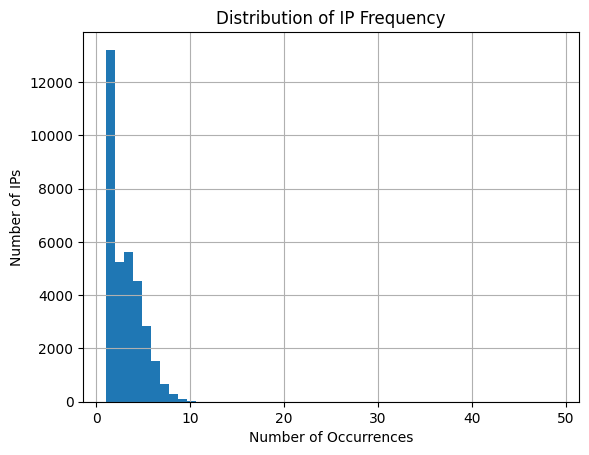

In [39]:
import matplotlib.pyplot as plt

ip_counts.hist(bins=50)
plt.xlabel('Number of Occurrences')
plt.ylabel('Number of IPs')
plt.title('Distribution of IP Frequency')
plt.show()


In [40]:
combined_df.to_csv("Log_dataset_combined.csv", index=False)